In [24]:
import pandas as pd
from pandas import DataFrame, read_excel, merge
import numpy as np
import matplotlib.pyplot as plt
#import rex
from collections import OrderedDict
import seaborn as sns
import matplotlib as mt

In [77]:
data = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Flat_Base\\Flat_Base_updated.csv', encoding="utf-8")

In [78]:
#data.dtypes

In [79]:
data['end'] = data['end'] .apply(str)
data['line_start'] = data['line_start'] .apply(str)
data['lower_line_y_val'] = data['lower_line_y_val'] .apply(str)
data['start_point'] = data['start_point'] .apply(str)
data['upper_line_y_val'] = data['upper_line_y_val'] .apply(str)

In [80]:
data['x']=data['end']+","+data['line_start']+","+data['lower_line_y_val']+","+data['start_point']+","+data['upper_line_y_val']
data['y']=['end','line_start','lower_line_y_val','start_point','upper_line_y_val']
data = data.drop(columns=['Unnamed: 0'])
data1=data[["x","y"]]
data1.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\Flat_Base\\Flat_Base_updated1_only_co-ordinates.csv')
data11 = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Flat_Base\\Flat_Base_updated1_only_co-ordinates.csv', encoding = "utf-8")
data11 = data11.drop(columns=['Unnamed: 0'])

In [81]:
data2 = pd.DataFrame(data11)
data2["first_x"] = data2["x"][0]
data2["first_y"] = data2["y"][0]
data2["first_x"][1:4] = ""
data2["first_y"][1:4] = ""
data2["x"].apply(lambda x: len(x.split(',')))
data3 = data2.drop(columns=['x','y'])

In [82]:
newx = data3["first_x"].str.split(",", n =4, expand = True)
newy = data3["first_y"].str.split(",", n =4, expand = True)
data3["x_0"] = pd.to_numeric(newx[0])
data3["x_1"] = pd.to_numeric(newx[1])
data3["x_2"] = pd.to_numeric(newx[2])
data3["x_3"] = pd.to_numeric(newx[3])
data3["x_4"] = pd.to_numeric(newx[4])

In [83]:
data3

,first_x,first_y,x_0,x_1,x_2,x_3,x_4
0,"1528329600000,1517270400000,36.23203295160127,...",end,1.528330e+12,1.517270e+12,36.232033,1.509667e+12,38.79844
1,,,NaN,NaN,NaN,NaN,NaN
2,,,NaN,NaN,NaN,NaN,NaN
3,,,NaN,NaN,NaN,NaN,NaN
4,"1528329600000,1517270400000,36.23203295160127,...",end,1.528330e+12,1.517270e+12,36.232033,1.509667e+12,38.79844


In [84]:
data3 = data3.melt(id_vars = ["first_x","first_y"],
                 var_name = "xx",
                 value_name = "Value")

data3 = data3.sort_values(by = ["xx"])
data3 = data3.mask(data3.eq('None')).dropna()
data3['Value'].replace('',np.nan, inplace=True)
data3.dropna(subset=['Value'], inplace = True)
data3

,first_x,first_y,xx,Value
0,"1528329600000,1517270400000,36.23203295160127,...",end,x_0,1.528330e+12
4,"1528329600000,1517270400000,36.23203295160127,...",end,x_0,1.528330e+12
5,"1528329600000,1517270400000,36.23203295160127,...",end,x_1,1.517270e+12
9,"1528329600000,1517270400000,36.23203295160127,...",end,x_1,1.517270e+12
14,"1528329600000,1517270400000,36.23203295160127,...",end,x_2,3.623203e+01
10,"1528329600000,1517270400000,36.23203295160127,...",end,x_2,3.623203e+01
15,"1528329600000,1517270400000,36.23203295160127,...",end,x_3,1.509667e+12
19,"1528329600000,1517270400000,36.23203295160127,...",end,x_3,1.509667e+12
20,"1528329600000,1517270400000,36.23203295160127,...",end,x_4,3.879844e+01
24,"1528329600000,1517270400000,36.23203295160127,...",end,x_4,3.879844e+01


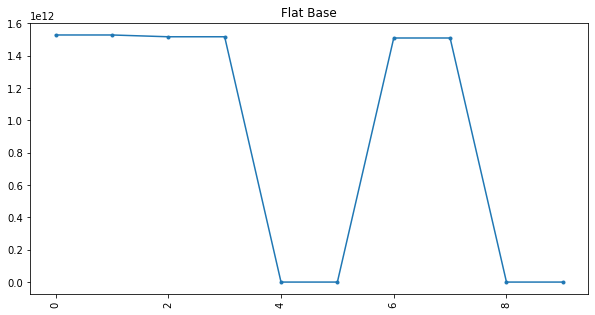

In [88]:
data3["xx"].value_counts()
graph_x = data3['Value'][0:10].tolist()
fig= plt.figure(figsize=(10, 5))
plt.title("Flat Base")
plt.xticks(rotation=90)
plt.plot(graph_x,marker=".")
plt.show()

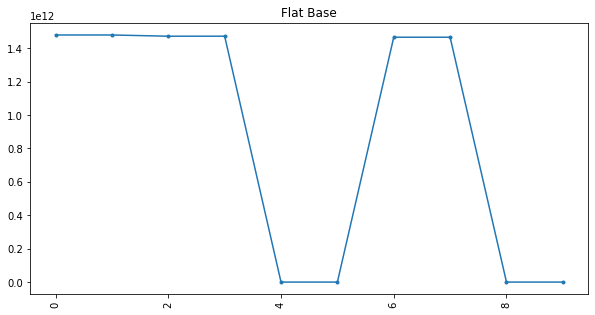

In [89]:
data = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Flat_Base\\Flat_Base_updated.csv', encoding="utf-8")
data['end'] = data['end'] .apply(str)
data['line_start'] = data['line_start'] .apply(str)
data['lower_line_y_val'] = data['lower_line_y_val'] .apply(str)
data['start_point'] = data['start_point'] .apply(str)
data['upper_line_y_val'] = data['upper_line_y_val'] .apply(str)
data['x']=data['end']+","+data['line_start']+","+data['lower_line_y_val']+","+data['start_point']+","+data['upper_line_y_val']
data['y']=['end','line_start','lower_line_y_val','start_point','upper_line_y_val']
data = data.drop(columns=['Unnamed: 0'])
data1=data[["x","y"]]
data1.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\Flat_Base\\Flat_Base_updated1_only_co-ordinates.csv')
data11 = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Flat_Base\\Flat_Base_updated1_only_co-ordinates.csv', encoding = "utf-8")
data11 = data11.drop(columns=['Unnamed: 0'])
data2 = pd.DataFrame(data11)
data2["first_x"] = data2["x"][1]
data2["first_y"] = data2["y"][1]
data2["first_x"][1:4] = ""
data2["first_y"][1:4] = ""
data2["x"].apply(lambda x: len(x.split(',')))
data3 = data2.drop(columns=['x','y'])
newx = data3["first_x"].str.split(",", n =4, expand = True)
newy = data3["first_y"].str.split(",", n =4, expand = True)
data3["x_0"] = pd.to_numeric(newx[0])
data3["x_1"] = pd.to_numeric(newx[1])
data3["x_2"] = pd.to_numeric(newx[2])
data3["x_3"] = pd.to_numeric(newx[3])
data3["x_4"] = pd.to_numeric(newx[4])
data3 = data3.melt(id_vars = ["first_x","first_y"],
                 var_name = "xx",
                 value_name = "Value")

data3 = data3.sort_values(by = ["xx"])
data3 = data3.mask(data3.eq('None')).dropna()
data3['Value'].replace('',np.nan, inplace=True)
data3.dropna(subset=['Value'], inplace = True)
data3["xx"].value_counts()
graph_x = data3['Value'][0:10].tolist()
fig= plt.figure(figsize=(10, 5))
plt.title("Flat Base")
plt.xticks(rotation=90)
plt.plot(graph_x,marker=".")
plt.show()

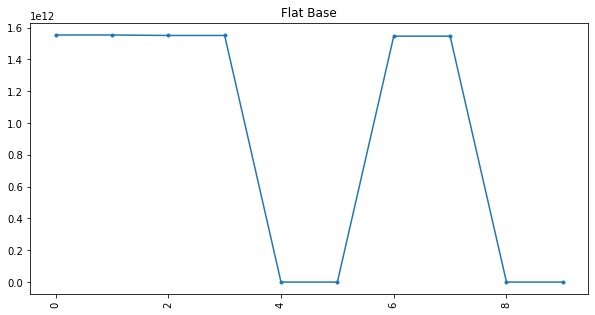

In [90]:
data = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Flat_Base\\Flat_Base_updated.csv', encoding="utf-8")
data['end'] = data['end'] .apply(str)
data['line_start'] = data['line_start'] .apply(str)
data['lower_line_y_val'] = data['lower_line_y_val'] .apply(str)
data['start_point'] = data['start_point'] .apply(str)
data['upper_line_y_val'] = data['upper_line_y_val'] .apply(str)
data['x']=data['end']+","+data['line_start']+","+data['lower_line_y_val']+","+data['start_point']+","+data['upper_line_y_val']
data['y']=['end','line_start','lower_line_y_val','start_point','upper_line_y_val']
data = data.drop(columns=['Unnamed: 0'])
data1=data[["x","y"]]
data1.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\Flat_Base\\Flat_Base_updated1_only_co-ordinates.csv')
data11 = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Flat_Base\\Flat_Base_updated1_only_co-ordinates.csv', encoding = "utf-8")
data11 = data11.drop(columns=['Unnamed: 0'])
data2 = pd.DataFrame(data11)
data2["first_x"] = data2["x"][2]
data2["first_y"] = data2["y"][2]
data2["first_x"][1:4] = ""
data2["first_y"][1:4] = ""
data2["x"].apply(lambda x: len(x.split(',')))
data3 = data2.drop(columns=['x','y'])
newx = data3["first_x"].str.split(",", n =4, expand = True)
newy = data3["first_y"].str.split(",", n =4, expand = True)
data3["x_0"] = pd.to_numeric(newx[0])
data3["x_1"] = pd.to_numeric(newx[1])
data3["x_2"] = pd.to_numeric(newx[2])
data3["x_3"] = pd.to_numeric(newx[3])
data3["x_4"] = pd.to_numeric(newx[4])
data3 = data3.melt(id_vars = ["first_x","first_y"],
                 var_name = "xx",
                 value_name = "Value")

data3 = data3.sort_values(by = ["xx"])
data3 = data3.mask(data3.eq('None')).dropna()
data3['Value'].replace('',np.nan, inplace=True)
data3.dropna(subset=['Value'], inplace = True)
data3["xx"].value_counts()
graph_x = data3['Value'][0:10].tolist()
fig= plt.figure(figsize=(10, 5))
plt.title("Flat Base")
plt.xticks(rotation=90)
plt.plot(graph_x,marker=".")
plt.show()

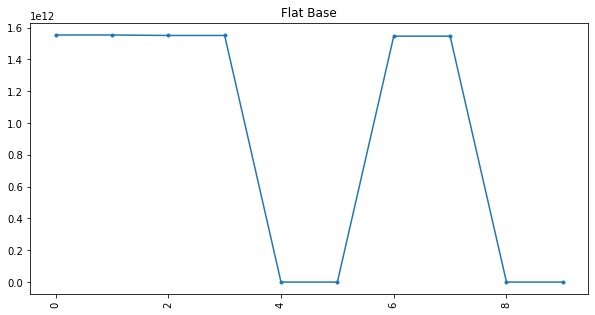

In [91]:
data = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Flat_Base\\Flat_Base_updated.csv', encoding="utf-8")
data['end'] = data['end'] .apply(str)
data['line_start'] = data['line_start'] .apply(str)
data['lower_line_y_val'] = data['lower_line_y_val'] .apply(str)
data['start_point'] = data['start_point'] .apply(str)
data['upper_line_y_val'] = data['upper_line_y_val'] .apply(str)
data['x']=data['end']+","+data['line_start']+","+data['lower_line_y_val']+","+data['start_point']+","+data['upper_line_y_val']
data['y']=['end','line_start','lower_line_y_val','start_point','upper_line_y_val']
data = data.drop(columns=['Unnamed: 0'])
data1=data[["x","y"]]
data1.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\Flat_Base\\Flat_Base_updated1_only_co-ordinates.csv')
data11 = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Flat_Base\\Flat_Base_updated1_only_co-ordinates.csv', encoding = "utf-8")
data11 = data11.drop(columns=['Unnamed: 0'])
data2 = pd.DataFrame(data11)
data2["first_x"] = data2["x"][3]
data2["first_y"] = data2["y"][3]
data2["first_x"][1:4] = ""
data2["first_y"][1:4] = ""
data2["x"].apply(lambda x: len(x.split(',')))
data3 = data2.drop(columns=['x','y'])
newx = data3["first_x"].str.split(",", n =4, expand = True)
newy = data3["first_y"].str.split(",", n =4, expand = True)
data3["x_0"] = pd.to_numeric(newx[0])
data3["x_1"] = pd.to_numeric(newx[1])
data3["x_2"] = pd.to_numeric(newx[2])
data3["x_3"] = pd.to_numeric(newx[3])
data3["x_4"] = pd.to_numeric(newx[4])
data3 = data3.melt(id_vars = ["first_x","first_y"],
                 var_name = "xx",
                 value_name = "Value")

data3 = data3.sort_values(by = ["xx"])
data3 = data3.mask(data3.eq('None')).dropna()
data3['Value'].replace('',np.nan, inplace=True)
data3.dropna(subset=['Value'], inplace = True)
data3["xx"].value_counts()
graph_x = data3['Value'][0:10].tolist()
fig= plt.figure(figsize=(10, 5))
plt.title("Flat Base")
plt.xticks(rotation=90)
plt.plot(graph_x,marker=".")
plt.show()

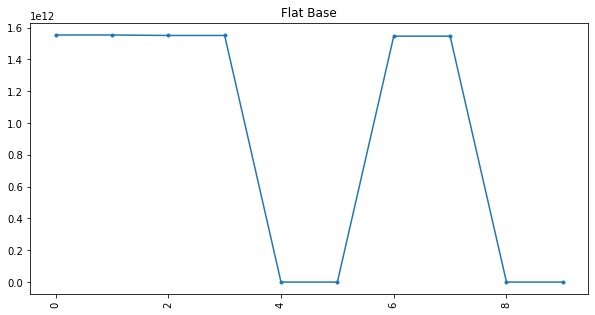

In [92]:
data = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Flat_Base\\Flat_Base_updated.csv', encoding="utf-8")
data['end'] = data['end'] .apply(str)
data['line_start'] = data['line_start'] .apply(str)
data['lower_line_y_val'] = data['lower_line_y_val'] .apply(str)
data['start_point'] = data['start_point'] .apply(str)
data['upper_line_y_val'] = data['upper_line_y_val'] .apply(str)
data['x']=data['end']+","+data['line_start']+","+data['lower_line_y_val']+","+data['start_point']+","+data['upper_line_y_val']
data['y']=['end','line_start','lower_line_y_val','start_point','upper_line_y_val']
data = data.drop(columns=['Unnamed: 0'])
data1=data[["x","y"]]
data1.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\Flat_Base\\Flat_Base_updated1_only_co-ordinates.csv')
data11 = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Flat_Base\\Flat_Base_updated1_only_co-ordinates.csv', encoding = "utf-8")
data11 = data11.drop(columns=['Unnamed: 0'])
data2 = pd.DataFrame(data11)
data2["first_x"] = data2["x"][4]
data2["first_y"] = data2["y"][4]
data2["first_x"][1:4] = ""
data2["first_y"][1:4] = ""
data2["x"].apply(lambda x: len(x.split(',')))
data3 = data2.drop(columns=['x','y'])
newx = data3["first_x"].str.split(",", n =4, expand = True)
newy = data3["first_y"].str.split(",", n =4, expand = True)
data3["x_0"] = pd.to_numeric(newx[0])
data3["x_1"] = pd.to_numeric(newx[1])
data3["x_2"] = pd.to_numeric(newx[2])
data3["x_3"] = pd.to_numeric(newx[3])
data3["x_4"] = pd.to_numeric(newx[4])
data3 = data3.melt(id_vars = ["first_x","first_y"],
                 var_name = "xx",
                 value_name = "Value")

data3 = data3.sort_values(by = ["xx"])
data3 = data3.mask(data3.eq('None')).dropna()
data3['Value'].replace('',np.nan, inplace=True)
data3.dropna(subset=['Value'], inplace = True)
data3["xx"].value_counts()
graph_x = data3['Value'][0:10].tolist()
fig= plt.figure(figsize=(10, 5))
plt.title("Flat Base")
plt.xticks(rotation=90)
plt.plot(graph_x,marker=".")
plt.show()